In [1]:
from latentmi import lmi
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scanpy as sc 
from tqdm.notebook import tqdm
import os

/home/gokul/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
held_out = sc.read_h5ad('../embeddings/PBMC_CITEseq/Q1.000_rep0/held_out_cells.h5ad')

emb = np.load('../embeddings/PBMC_CITEseq/Q1.000_rep0/PCA_frac1.000.npy')

In [3]:
d = {
    'Embedding dimensions' : [],
    'MI' : []
}

for i in range(1, 10):
    pmis, _, _ = lmi.estimate(np.tile(emb, (1, i)), held_out.obsm['protein_counts'], quiet=False, batch_size=2048)

    d['Embedding dimensions'].append(16*i)
    d['MI'].append(np.nanmean(pmis))

epoch 299 (of max 300) 🌻🌻🌻🌻🌻🌻🌻🌻🌻

In [6]:
df = pd.DataFrame(d)
df

,Embedding dimensions,MI
0,16,4.417538
1,32,4.438796
2,48,4.350893
3,64,4.418524
4,80,4.343531
5,96,4.354344
6,112,4.363657
7,128,4.358677
8,144,4.352206


In [9]:
sns.set_style('whitegrid')
rcParams['figure.dpi'] = 150
rcParams['figure.figsize'] = (4, 3)
rcParams['grid.linewidth'] = 0.5
rcParams['grid.linestyle'] = 'dashed'
rcParams['legend.fancybox'] = False
rcParams['mathtext.fontset'] = 'stix'

dpi = 150

hue_order = ["VAE", "PCA", "nanoTxformer", "RandomProjection"]
c6 = ['#c4bae2','#40ada6','#3c4ebf',  
        '#e3a600', '#edb1a3', '#d6543a',]
pretty_palette = [c6[c] for c in range(6) if c in [1,2,3,5]]

(0.0, 5.0)

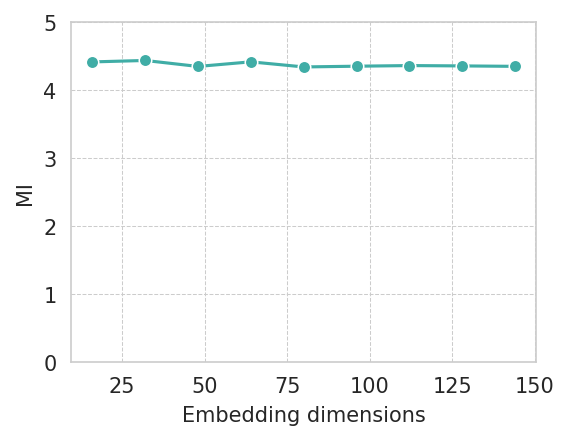

In [12]:
sns.lineplot(df, x='Embedding dimensions', y='MI', marker='o', color=pretty_palette[0])
plt.ylim(0, 5)